## HW7: K-means Clustering and Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import pandas as pd
import scipy.io as sio
from scipy import optimize
from sklearn import svm
from random import randint
from scipy.spatial import distance
import matplotlib.image as mpimg

(300, 2)


Text(0,0.5,'$x2$')

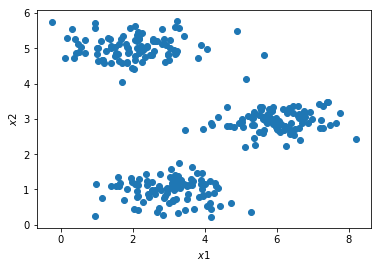

In [2]:
data = sio.loadmat('data/ex7data2.mat')
# print data
X = data['X']
X1 = X[:,0]
X2 = X[:,1]

print X.shape

fig, ax = plt.subplots()
# ax.plot(X, Y, 'x', markeredgewidth=2)
plt.scatter(X1, X2)#, cmap=plt.cm.autumn)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')

initial guess = 
[[ 5.88735565  3.34615566]
 [ 3.49798412  1.10046402]
 [ 3.63586049  1.12160194]]
final centers = 
[[ 6.03366736  3.00052511]
 [ 1.95399466  5.02557006]
 [ 3.04367119  1.01541041]]


Text(0,0.5,'$x2$')

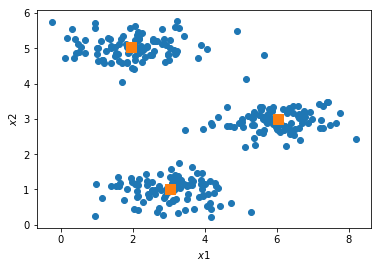

In [3]:
def initPosition(X,k):
    seed = [randint(0, X.shape[0]) for p in range(0, k)]
    return X[seed]

def labelX(centers,X):
    dist = distance.cdist(centers,X)
    label = np.argmin(dist, axis=0)
    return label

def updateCentroid(centers,label,X):
    for i in xrange(centers.shape[0]):
        centers[i,:] = 1./(label == i).sum() * np.sum(X[np.where(label==i)],axis=0)
    return centers

def Kmeans(X,k):
    centers = initPosition(X,k)
    print "initial guess = \n", centers
    for i in xrange(100):
        labels = labelX(centers,X)
        centers = updateCentroid(centers,labels,X)
    print "final centers = \n", centers
    
    return centers

kmean_centers = Kmeans(X,3)
fig, ax = plt.subplots()
plt.scatter(X1, X2)#, cmap=plt.cm.autumn)
plt.scatter(kmean_centers[:,0],kmean_centers[:,1],marker='s',s=100)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')


# centers = initPosition(X,3)
# print centers
# a = labelX(centers,X)
# updateCentroid(centers,a)

# b = labelX(a,X)
# print X[0]
# np.where(b==1)
# X[np.where(b==1)]

# a = np.array([[0,2],[2,4],[1,0]]) #points
# b = np.array([[1,1],[1,0]]) #centers
# # # np.argmax(a)
# # print a.shape
# c = distance.cdist(b,a)
# print c
# np.argmin(c,axis=0)

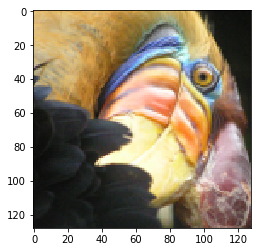

In [4]:
data = mpimg.imread('data/bird_small.png')

plt.imshow(data)

In [5]:
data_ = data.reshape(128*128,3)

In [6]:
kmean_centers = Kmeans(data_,16)

initial guess = 
[[ 0.87058824  0.71764708  0.36862746]
 [ 0.10196079  0.1254902   0.11764706]
 [ 0.8392157   0.68627453  0.43137255]
 [ 0.1254902   0.14117648  0.15686275]
 [ 0.16470589  0.18039216  0.18039216]
 [ 0.99215686  0.98431373  0.81176472]
 [ 0.44705883  0.47843137  0.50196081]
 [ 0.07450981  0.07843138  0.0627451 ]
 [ 0.56470591  0.49019608  0.52549022]
 [ 0.23137255  0.26274511  0.26274511]
 [ 0.05098039  0.0627451   0.04313726]
 [ 0.08627451  0.09803922  0.09411765]
 [ 0.09019608  0.09019608  0.07450981]
 [ 0.63137257  0.65882355  0.70588237]
 [ 0.08235294  0.10196079  0.09803922]
 [ 0.86666667  0.72156864  0.43529412]]
final centers = 
[[ 0.86720997  0.71277672  0.44781151]
 [ 0.4695825   0.33892503  0.18134692]
 [ 0.72919261  0.64883107  0.56497651]
 [ 0.51325381  0.42039987  0.36793119]
 [ 0.52668715  0.65483457  0.82758987]
 [ 0.97926754  0.94640219  0.81295103]
 [ 0.62572235  0.5397222   0.45944932]
 [ 0.13851877  0.14552234  0.13703576]
 [ 0.82793003  0.59376532  0.

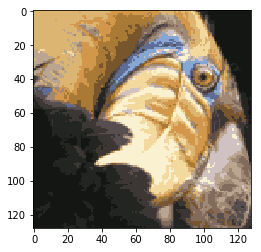

In [7]:
labels = labelX(kmean_centers,data_)
compressed_image = kmean_centers[labels].reshape(data.shape)
plt.imshow(compressed_image)

(50, 2)


Text(0,0.5,'$x2$')

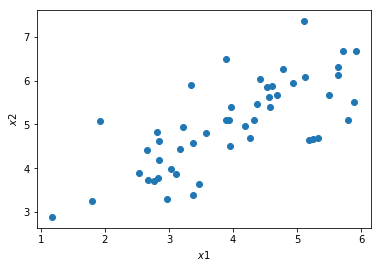

In [8]:
data = sio.loadmat('data/ex7data1.mat')
# print data
X = data['X']
X1 = X[:,0]
X2 = X[:,1]

print X.shape

fig, ax = plt.subplots()
# ax.plot(X, Y, 'x', markeredgewidth=2)
plt.scatter(X1, X2)#, cmap=plt.cm.autumn)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')

Text(0,0.5,'$x2$')

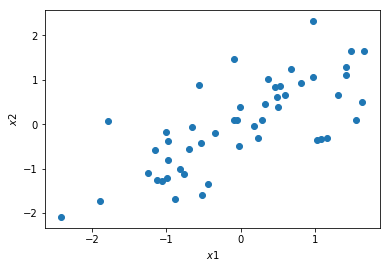

In [9]:
### plotting normalized data
X_norm = (X-np.mean(X,axis=0))/np.std(X,axis=0)
X1 = X_norm[:,0]
X2 = X_norm[:,1]
fig, ax = plt.subplots()
# ax.plot(X, Y, 'x', markeredgewidth=2)
plt.scatter(X1, X2)#, cmap=plt.cm.autumn)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')

In [10]:
X_cov = 1./X.shape[0]*np.dot(X_norm.T,X_norm)
u, s, vh = np.linalg.svd(X_cov, full_matrices=True)
# print u,"\n",s
# a = u[:,0]*s[0]
# b = u[:,1]*s[1]
# np.dot(a,b)

(2,)


(-2, 2)

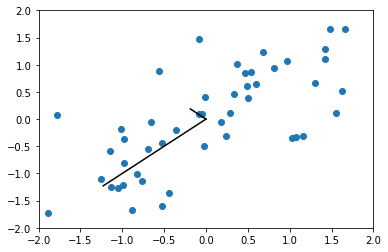

In [11]:
print (u[:,0]*s[0]).shape

plt.plot([0,(u[:,0]*s[0])[0]],[0,(u[:,0]*s[0])[1]],c='black')
plt.plot([0,(u[:,1]*s[1])[0]],[0,(u[:,1]*s[1])[1]],c='black')
plt.scatter(X1, X2)#, cmap=plt.cm.autumn)

plt.xlim(-2,2)
plt.ylim(-2,2)

In [13]:
def projectData(X,u,k):
    return np.dot(X,u[:,:k])

In [14]:
z = projectData(X_norm,u,1)
# print z[0]

In [15]:
def reconstrucData(z,u,k):
    return np.dot(z,u[:,:k].T)

In [16]:
X_recon = reconstrucData(z,u,1)

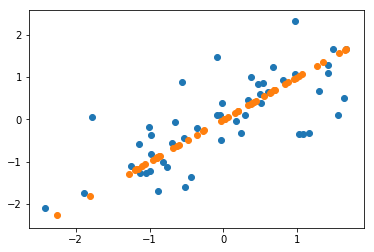

In [17]:
plt.scatter(X1, X2)#, cmap=plt.cm.autumn)
plt.scatter(X_recon[:,0], X_recon[:,1])#, cmap=plt.cm.autumn)

## PCA on face dataset

In [18]:
X = sio.loadmat('data/ex7faces.mat')['X']

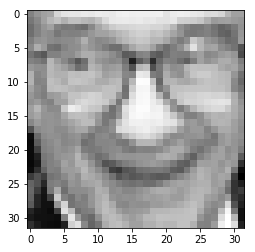

In [19]:
plt.imshow(X[0,:].reshape(32,32,order='F'), cmap = cm.Greys_r)

In [20]:
X_norm = (X-np.mean(X,axis=0))/np.std(X,axis=0)

In [23]:
X_cov = 1./X.shape[0]*np.dot(X_norm.T,X_norm)
u, s, vh = np.linalg.svd(X_cov, full_matrices=True)
# u[:,:36].shape

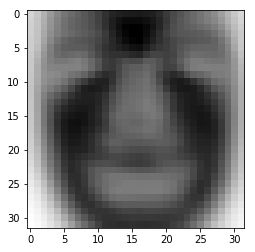

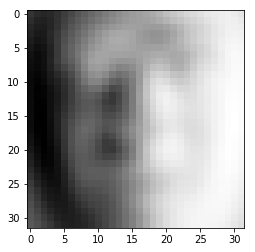

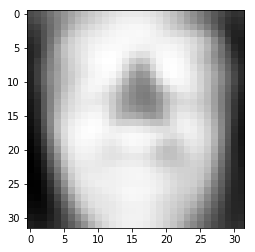

In [24]:
plt.imshow(u[:,0].reshape(32,32,order="F"),cmap = cm.Greys_r)
plt.show()
plt.imshow(u[:,1].reshape(32,32,order="F"),cmap = cm.Greys_r)
plt.show()
plt.imshow(u[:,2].reshape(32,32,order="F"),cmap = cm.Greys_r)
plt.show()

In [25]:
z = projectData(X_norm,u,100)
# print z.shape
X_recon = reconstrucData(z,u,100)
# print X_recon.shape

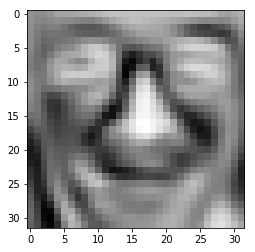

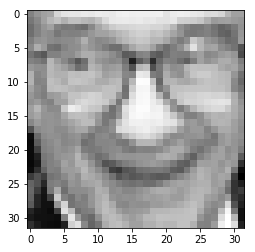

In [26]:
plt.imshow(X_recon[0,:].reshape(32,32,order="F"),cmap = cm.Greys_r)
plt.show()
plt.imshow(X[0,:].reshape(32,32,order="F"),cmap = cm.Greys_r)
plt.show()
